### Abstract

#### Background

1. Quantify nephrectomy-attributable risk of ESRD and mortality
2. escribe the prevalence of hospitalizations in older donors vs. older nondonors
3. Implement a risk calculator for ESRD, mortality, and sentinel hospitalization in older donors 

#### Methods

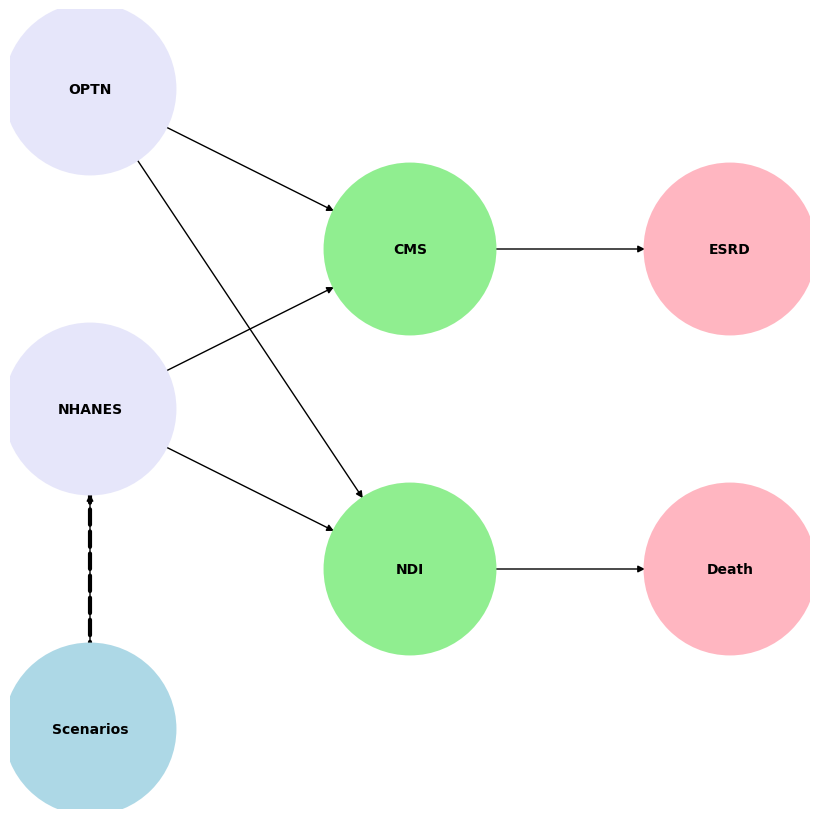

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("OPTN", pos=(-4000, 800))
G.add_node("NHANES", pos=(-4000, 0))
G.add_node("Scenarios", pos=(-4000, -800))
G.add_node("CMS", pos=(0, 400))
G.add_node("NDI", pos=(0, -400))
G.add_node("ESRD", pos=(4000, 400))
G.add_node("Death", pos=(4000, -400))

G.add_edges_from([("OPTN", "CMS"), ("OPTN", "NDI")])
G.add_edges_from([("NHANES", "CMS"), ("NHANES", "NDI"), ("Scenarios", "NHANES")])
G.add_edges_from([("CMS", "ESRD"), ("NDI", "Death")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"OPTN": "OPTN",
          "NHANES": "NHANES",
          "Scenarios": "Scenarios",
          "CMS": "CMS",
          "NDI": "NDI",
          "ESRD": "ESRD",
          "Death": "Death"}

# Update color for the "Scenarios" node
node_colors = ["lavender", "lavender", "lightblue", "lightgreen", "lightgreen", "lightpink", "lightpink"]

edge_styles = [("NHANES", "Scenarios", "dashed")]

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=False, node_size=15000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=edge_styles, edge_color='black', style='dashed', width=3)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")
plt.show()




$$\Large 1-e^{-\int h_0(t)exp(X\beta)}$$

Where:  
- $h_0(t)$ 
   - Nonparametric hazard for the base-case
<br>
<br>
- $exp(X\beta)$ 
   - Maximum-likelihood estimate of the difference (on a log scale) between the hazard for the base-case and the hazard for the specific clinical scenario with explanatory variables $X$
<br>
<br>
- $t$ 
   - Years of follow-up (tentatively 15y but will update to 30y later in January).

#### Results
   
- Donors (OPTN)
   - Missingness on key risk factors 
      - **uACR** is 100% missing for donors
      - **BMI, SBP, DBP,** and **eGFR** conditionally missing (e.g. before 2005)
      - Only **Age, Race,** and **Sex** are 0% missing throughout the study period
   - However, nondonor base-case informed by our prior beliefs about characteristics eligible donors
   - Thus, instead of detailing history, exam, and lab findings, we only outline demographics:
      - Age
      - Race
      - Sex

- Nondonors (NHANES)
   - We describe a base-case below:
      - 60y
      - White
      - Female
      - College Education
      - BMI $24\ kg/m^2$
      - SBP $120\ mmHg$ 
      - DBP $75\ mmHg$
      - eGFR $90\ ml/min/1.73m^2$
      - uACR 4 $mg/g$
      

![](./donor_nondonor.png)

---

![](./donor_nondonor_esrd.png)

---

![](./nejm_table3_s6.png)

#### Inferences

- Will show that impact of donation on this base-case scenario is:
   - SBP $+20\text{mmHg}$
   - eGFR $-30\text{ml/min}$
- This is the nephrectomy attributable risk
- A webApp (online risk calculator) will allow a user to personalize the risk estimates

- Our inferences have `face validity`:
   - Grams et al NEJM 2016 reports similar risk to ours using scenario 6 of Table 3
   - Donor followup studies report a 30% reduction in baseline eGFR after the 1st year of followup
   - Increased blood pressure is observed following nephrectomy




